# YouTube Ranking 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

In [33]:
df = pd.read_csv('유튜브랭킹.csv')
df.head(3)

,순위,카테고리,이름,구독자수,뷰,비디오
0,1,음악/댄스/가수,BLACKPINK,70200000,21457090000,395
1,2,음악/댄스/가수,HYBE LABELS,63000000,20496840000,725
2,3,음악/댄스/가수,BANGTANTV,61500000,14077940000,"1,646"


In [34]:
df.columns


Index(['순위', '카테고리', '이름', '구독자수', '뷰', '비디오'], dtype='object')

In [35]:
df['구독자수'] = df['구독자수'].apply(int)
df['뷰'] = df['뷰'].apply(int)
df['비디오'] = df['비디오'].str.replace(',','').astype(int)

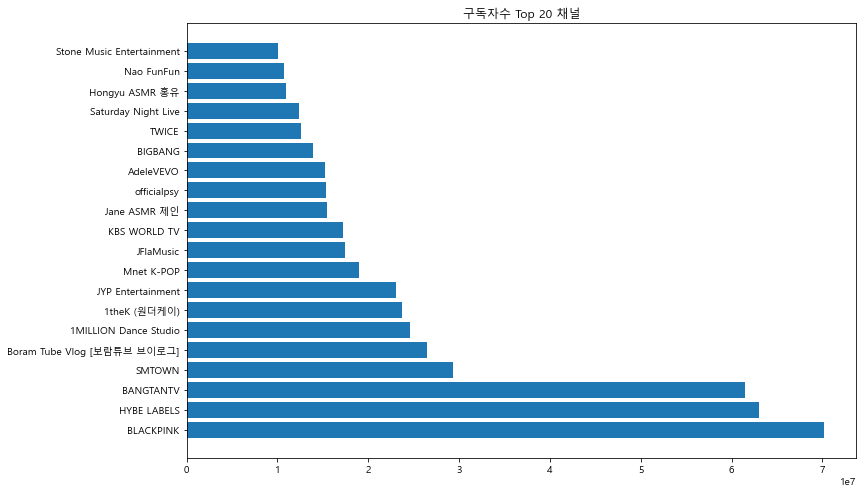

In [38]:
plt.figure(figsize=(12,8))
plt.barh(df['이름'].head(20),df['구독자수'].head(20))
plt.title('구독자수 Top 20 채널')
plt.show()

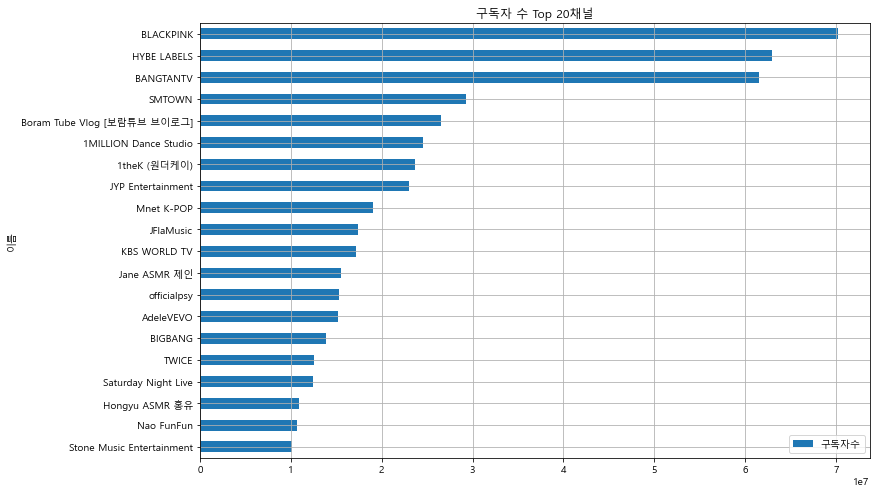

In [53]:
df2 = df[['이름','구독자수']].head(20)
df2.set_index('이름',inplace=True)
df2.sort_values(by='구독자수').plot(kind='barh',grid=True,figsize=(12,8))
plt.title('구독자 수 Top 20채널')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

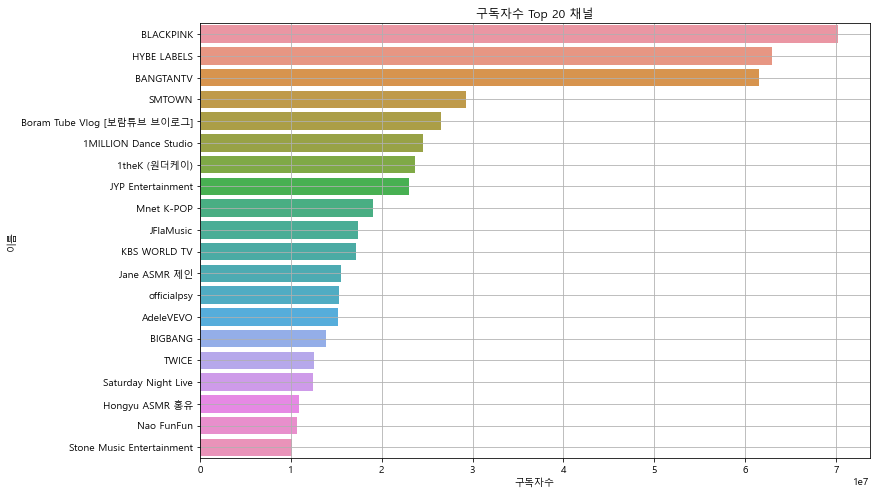

In [57]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.barplot(y='이름',x='구독자수',data=df.head(20))
plt.title('구독자수 Top 20 채널')
plt.grid()
plt.show

- 조회수 기준 Top20 채널

<function matplotlib.pyplot.show(close=None, block=None)>

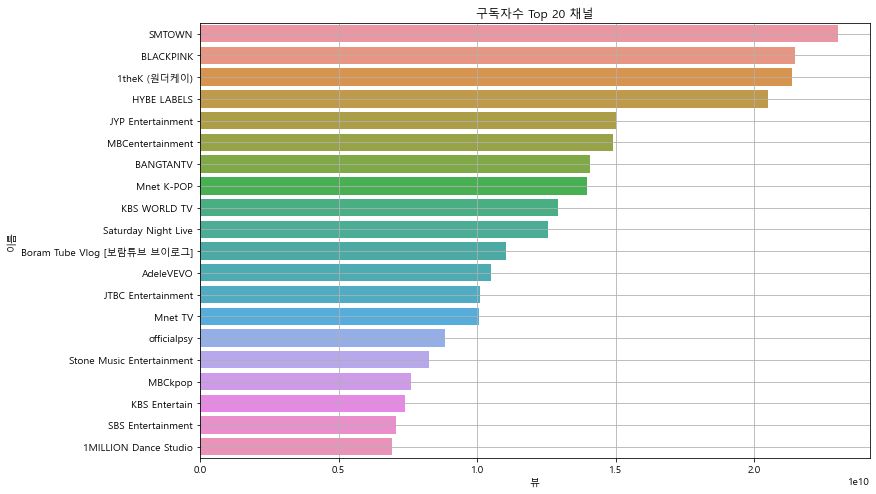

In [60]:
plt.figure(figsize=(12,8))
df2 = df.sort_values(by='뷰', ascending=False).head(20)
sns.barplot(y='이름',x='뷰',data=df2.head(20))
plt.title('뷰 Top 20 채널')
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

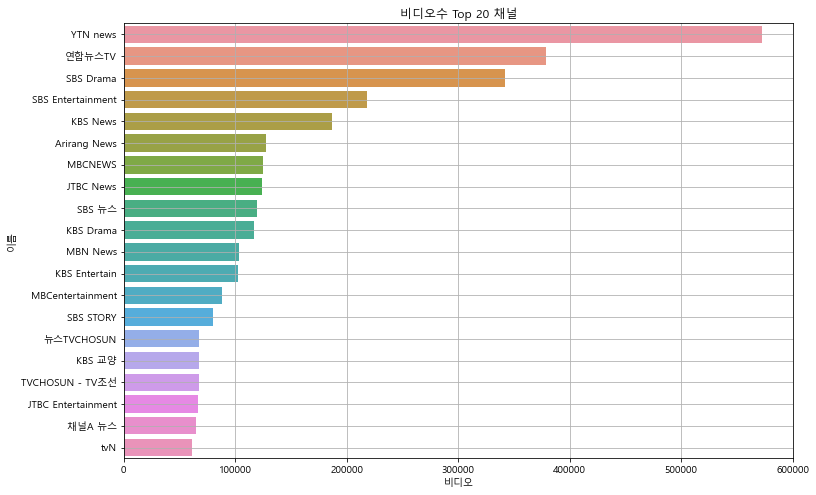

In [118]:
plt.figure(figsize=(12,8))
df2 = df.sort_values(by='비디오', ascending=False).head(20)
sns.barplot(y='이름',x='비디오',data=df2.head(20))
plt.title('비디오수 Top 20 채널')
plt.grid()
plt.show

- 카테고리별 채널수

In [76]:
df3 = df['카테고리'].value_counts().to_frame()

In [77]:
df['카테고리'].value_counts().to_frame().head(20)

,카테고리
음악/댄스/가수,172
TV/방송,144
미분류,126
키즈/어린이,89
음식/요리/레시피,83
게임,70
BJ/인물/연예인,66
뉴스/정치/사회,53
패션/미용,42
취미/라이프,37


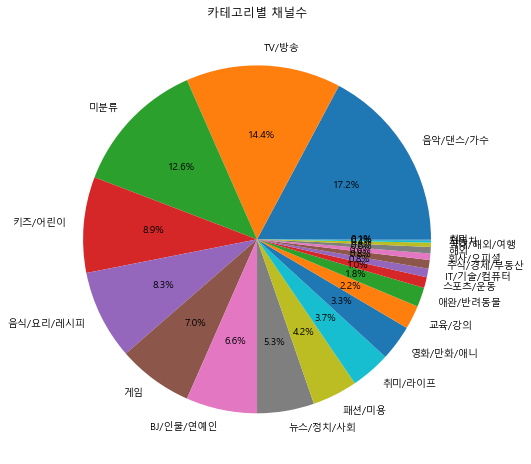

In [79]:
plt.figure(figsize=(12,8))
plt.pie('카테고리', labels=df3.index, data=df3, autopct='%.1f%%')
plt.title('카테고리별 채널수')
plt.grid()

In [82]:
plt.figure(figsize=(12,8))
plt.pie('카테고리', labels=df3.index, data=df3, autopct='%.1f%%')
plt.title('카테고리별 채널수')
plt.grid()

0      []
1      []
2      []
3      []
4      []
       ..
995    []
996    []
997    []
998    []
999    []
Name: 카테고리, Length: 1000, dtype: object

In [93]:
df4 = df.groupby('카테고리')['구독자수'].sum().to_frame()
df4.sort_values(by='구독자수',ascending=False,inplace=True)
df4

,구독자수
카테고리,
음악/댄스/가수,715400000
키즈/어린이,270640000
TV/방송,241660000
음식/요리/레시피,185020000
미분류,133330000
BJ/인물/연예인,93710000
뉴스/정치/사회,75100000
게임,70960000
취미/라이프,48930000


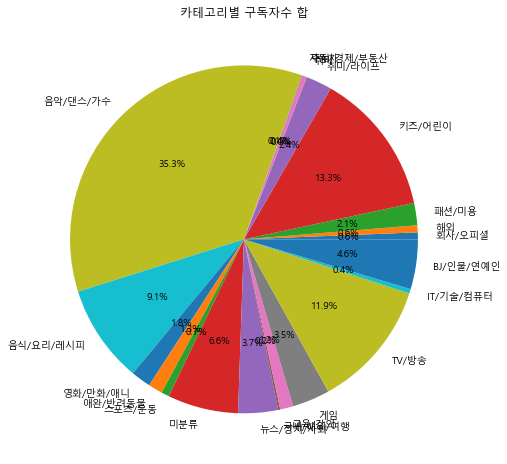

In [130]:
plt.figure(figsize=(12,8))
plt.pie('구독자수', labels=df4.index, data=df4, autopct='%.1f%%')
plt.title('카테고리별 구독자수 합')
plt.grid()
plt.show()

In [110]:
df4.index

Index(['음악/댄스/가수', '키즈/어린이', 'TV/방송', '음식/요리/레시피', '미분류', 'BJ/인물/연예인',
       '뉴스/정치/사회', '게임', '취미/라이프', '패션/미용', '영화/만화/애니', '애완/반려동물', '교육/강의',
       '스포츠/운동', '해외', '회사/오피셜', 'IT/기술/컴퓨터', '주식/경제/부동산', '국내/해외/여행', '자동차',
       '취미'],
      dtype='object', name='카테고리')

In [117]:
df4 = df.groupby('카테고리')['구독자수'].agg(['count','sum'])
df4.sort_values(by='카테고리',ascending=False,inplace=True)
df4.columns = ['채널수','구독자수']
df4

,채널수,구독자수
카테고리,,
회사/오피셜,6,13080000
해외,6,13180000
패션/미용,42,41950000
키즈/어린이,89,270640000
취미/라이프,37,48930000
취미,1,610000
주식/경제/부동산,8,8190000
자동차,2,1380000
음악/댄스/가수,172,715400000


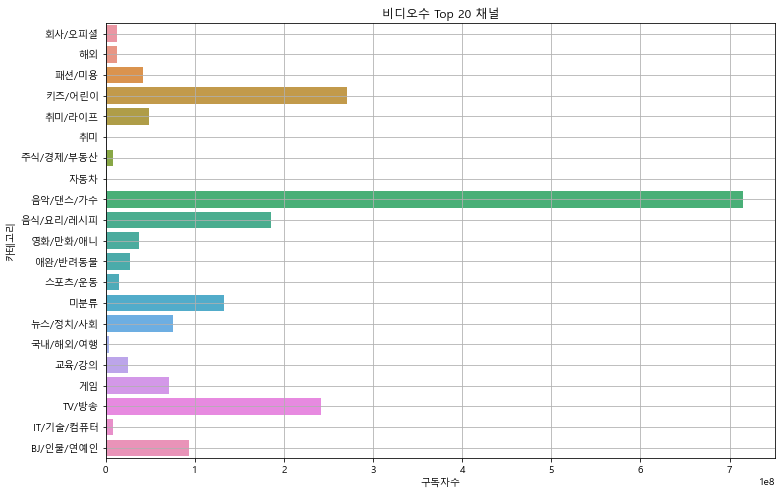

In [132]:
plt.figure(figsize=(12,8))
sns.barplot(x='구독자수',y=df4.index, data=df4)
plt.title('비디오수 Top 20 채널')
plt.grid()
plt.show()